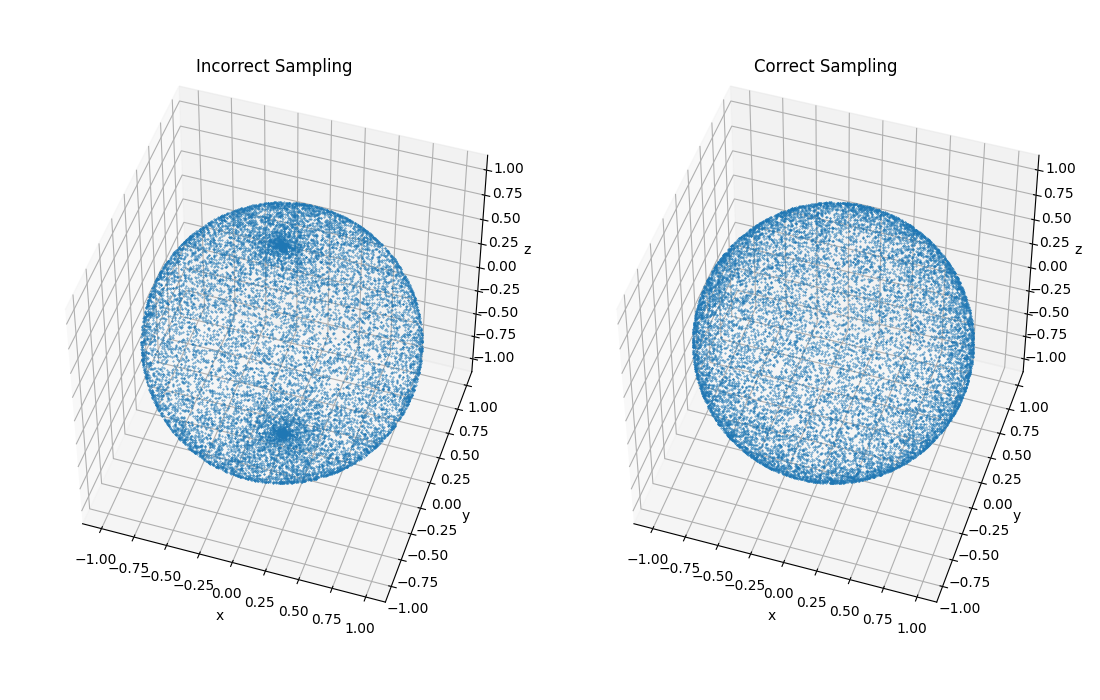

In [1]:
"""surface_sampling_sphere.ipynb"""
# Cell 1

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
import numpy.random as random
from matplotlib.markers import MarkerStyle

if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget


def plot_incorrect(ax: Axes) -> None:
    num_samples = 15000

    u: NDArray[np.float_] = random.rand(num_samples) * np.pi  # poloidal angle
    v: NDArray[np.float_] = random.rand(num_samples) * 2 * np.pi  # toroidal angle

    x: NDArray[np.float_] = np.array(np.sin(u) * np.sin(v), dtype=np.float_)
    y: NDArray[np.float_] = np.array(np.sin(u) * np.cos(v), dtype=np.float_)
    z: NDArray[np.float_] = np.cos(u)

    ax.set_title("Incorrect Sampling")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")  # type: ignore

    ax.view_init(azim=-72, elev=48)  # type: ignore
    ax.set_aspect("equal") # this changes the sphere to be less squished looking

    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    ax.scatter(x, y, z, marker=MarkerStyle("."), s=pixel_size, depthshade=False)  # type: ignore


def plot_correct(ax: Axes) -> None:
    num_samples = 15000

    # Changed random.rand(num_samples) * np.pi to np.arccos(2 * random.rand(num_samples) - 1
    # This works because instead of going from 0 to pi, it creates a more uniform distribution
    # of numbers in the random sampling and arccos goes from -1 to 1. But arccos is a little
    # skewed so we multiply by 2 and subtract 1 to make the numbers more uniformly distributed.
    u: NDArray[np.float_] = np.arccos(2 * random.rand(num_samples) - 1) # poloidal angle
    v: NDArray[np.float_] = random.rand(num_samples) * 2 * np.pi  # toroidal angle

    x: NDArray[np.float_] = np.array(np.sin(u) * np.sin(v), dtype=np.float_)
    y: NDArray[np.float_] = np.array(np.sin(u) * np.cos(v), dtype=np.float_)
    z = np.cos(u)

    ax.set_title("Correct Sampling")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")  # type: ignore

    ax.view_init(azim=-72, elev=48)  # type: ignore
    ax.set_aspect("equal") # this changes the sphere to be less squished looking

    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    ax.scatter(x, y, z, marker=MarkerStyle("."), s=pixel_size, depthshade=False)  # type: ignore


def main() -> None:
    plt.close("all")
    plt.figure(" ", figsize=((11, 7)), constrained_layout=True)
    plot_incorrect(plt.subplot(121, projection="3d"))
    plot_correct(plt.subplot(122, projection="3d"))
    plt.show()


main()